# Прогнозирование коэффициент восстановления золота из руды.

### Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

### 1.1 Загрузка и первый взгляд на данные.

In [210]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# модель
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# метрика
from sklearn.metrics import mean_squared_error,  make_scorer

from sklearn.dummy import DummyClassifier

In [211]:
# чтение файла и печать общей информации
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

df_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [212]:
df_test.head(2)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438


In [213]:
df_full.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

### 1.2. Проверка эффективности обогащения

In [214]:
mae_df = df_train.dropna()

C = mae_df.loc[:, ('rougher.output.concentrate_au')]
F = mae_df.loc[:, ('rougher.input.feed_au')]
T = mae_df.loc[:, ('rougher.output.tail_au')]
mae_df['rougher.output.recovery_new'] = (C * (F - T)) / (F * (C - T)) * 100

recovery_MAE = (
    mean_squared_error(mae_df.loc[:, ('rougher.output.recovery_new')], 
                       mae_df.loc[:, ('rougher.output.recovery')])
)
print('MAE', recovery_MAE)
print('Среднее рассчитанное recovery', mae_df.loc[:, ('rougher.output.recovery_new')].mean())
print('Среднее recovery', mae_df.loc[:, ('rougher.output.recovery')].mean())

MAE 2.0687703599800886e-28
Среднее рассчитанное recovery 82.7418884610155
Среднее recovery 82.7418884610155


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Средние значений предоставленных даненых и рассчитанные значений recovery равны, MAE примерно около 0.  Можно сделать вывод, что эффективность обогащения рассчитана верно.

### 1.3 Анализ признаков тестовой выбоки.

Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [215]:
train = set(df_train.columns)
test = set(df_test.columns)
clmn = train - test
clmn

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутвуют следующие параметры:
- параметры продукта
- расчётные характеристики
- финальные характеристики


Тамким образом можно сделать вывод, что в тестирование не участыую параметры сырья. Также в тестовом наборе нет целевых признаков. эти сторбцы можно удалить так как признаки на обучающей выборке и тестовой  должны совпадать.

In [216]:
df_train_new = df_train.drop(['rougher.output.concentrate_ag',
 'secondary_cleaner.output.tail_ag',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.tail_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.tail_au',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.tail_sol',
 'final.output.tail_pb',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'rougher.output.tail_ag',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.recovery',
 'rougher.output.concentrate_pb',
 'final.output.concentrate_pb',
 'final.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'final.output.concentrate_au',
 'final.output.tail_au',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.output.tail_sol'], axis=1)
df_train_new.head(1)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.91214,1551.434204,-516.403442,1549.873901,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198


### 1.4  Предобработка данных

In [217]:
df_train_new = df_train_new.fillna(method='ffill')


#df_train.isnull().sum()
df_train_new

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [218]:
df_test = df_test.fillna(method='ffill')
#df_test.isnull().sum()

In [219]:
df_full['rougher.output.recovery'] = df_full['rougher.output.recovery'].dropna()
df_full['final.output.recovery'] = df_full['final.output.recovery'].dropna()
df_full = df_full.fillna(method='ffill')
#df_full.isnull().sum()

# 2. Анализ данных

### 2.1. Изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

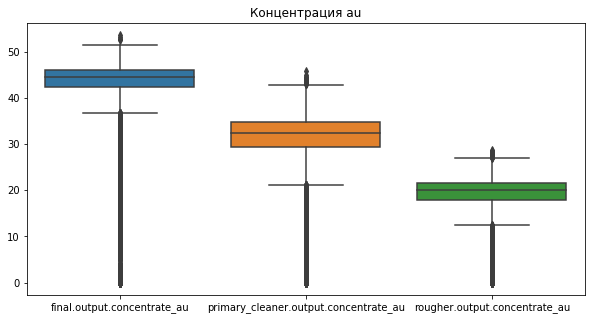

In [220]:
columns_au = df_full.columns[df_full.columns.str.contains('concentrate_au')]
concentrate_au = df_full[columns_au]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)
ax.set(title='Концентрация au')
ax = sns.boxplot(data=concentrate_au)

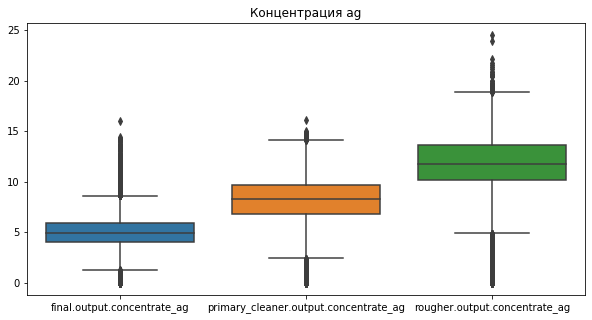

In [221]:
columns_ag = df_full.columns[df_full.columns.str.contains('concentrate_ag')]
concentrate_ag = df_full[columns_ag]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)
ax.set(title='Концентрация ag')
ax = sns.boxplot(data=concentrate_ag)

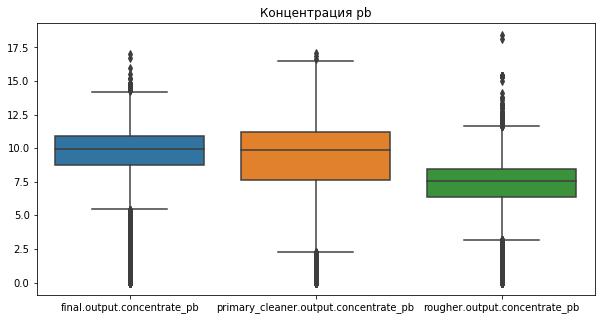

In [222]:
columns_pb = df_full.columns[df_full.columns.str.contains('concentrate_pb')]
concentrate_pb = df_full[columns_pb]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)
ax.set(title='Концентрация pb')
ax = sns.boxplot(data=concentrate_pb)
plt.show()

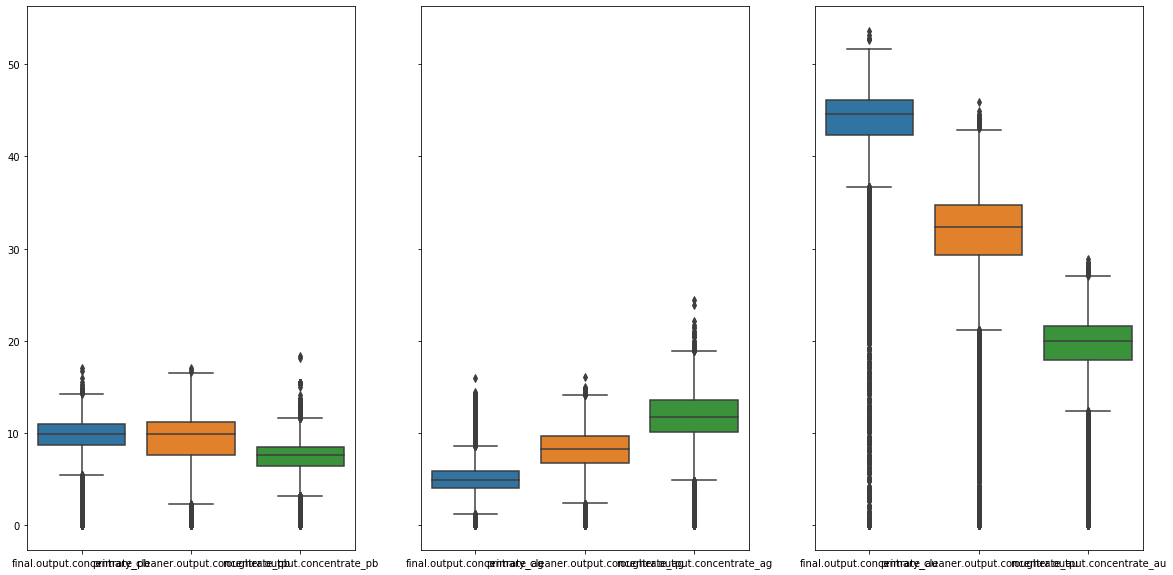

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10), sharey=True)
ax[0].set(title='')
sns.boxplot(data=concentrate_pb, ax=ax[0])
sns.boxplot(data=concentrate_ag, ax=ax[1])
sns.boxplot(data=concentrate_au, ax=ax[2])
plt.show()

Как видно из графиков к финальному продукту концентрация золота возрастает, а содержание других металлов снижается, что подтвереждается качество очистки.

### 2.2. Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. 
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

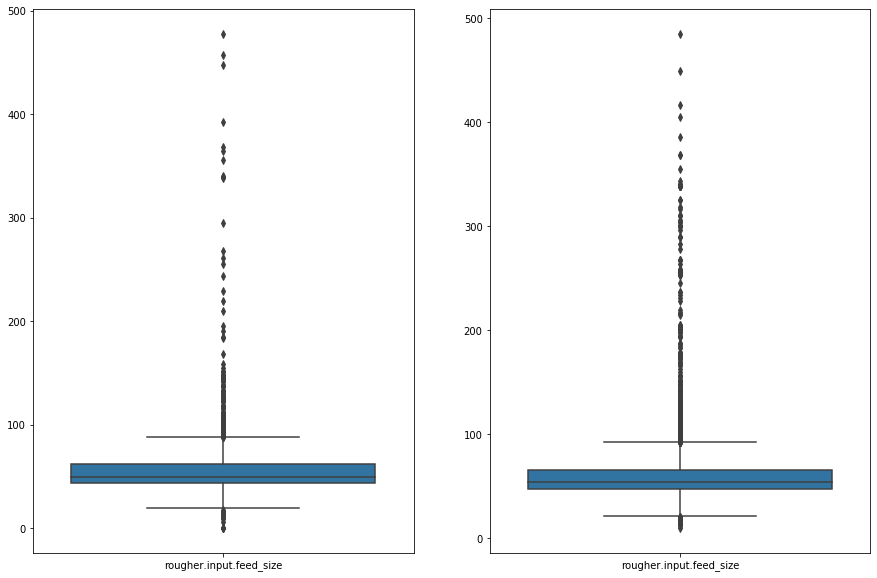

In [224]:
columns = df_test.columns[df_test.columns.str.contains('feed_size')]
size_test = df_test[columns]
size_train = df_train_new[columns]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.boxplot(data=size_test[['rougher.input.feed_size']], ax=ax[0])
sns.boxplot(data=size_train[['rougher.input.feed_size']], ax=ax[1])
plt.show()

Разброс разбера данных идентичен на обучающей и тестовой выборках

### 2.3. Исследование суммарной концентрации всех веществ на разных стадиях.

В сырье, в черновом и финальном концентратах. Проверка на наличие аномальных значений в суммарном распределении.
Если они есть, стоит ли их удалять из обеих выборок?

Для этого воспользуюсь столбцами:
- rougher.input.feed_МЕТАЛЛ
- rougher.output.concentrate...
- primary_cleaner.output.concentrate...
- final.output.concentrate....

In [225]:

columns = df_full.columns[df_full.columns.str.contains('rougher')]
rougher_feed = df_full[columns]
rougher_feed['rougher_all'] = (
    rougher_feed['rougher.input.feed_ag'] + 
    rougher_feed['rougher.input.feed_pb'] + 
    rougher_feed['rougher.input.feed_sol'] + 
    rougher_feed['rougher.input.feed_au']
)

rougher_all = rougher_feed[['rougher_all']]

columns = df_full.columns[df_full.columns.str.contains('primary_cleaner.output.concentrate')]
primary_cleaner = df_full[columns]
primary_cleaner['primary_cleaner_all'] = (
    primary_cleaner['primary_cleaner.output.concentrate_ag'] + 
    primary_cleaner['primary_cleaner.output.concentrate_pb'] + 
    primary_cleaner['primary_cleaner.output.concentrate_au'] + 
    primary_cleaner['primary_cleaner.output.concentrate_sol'])
primary_cleaner_all = primary_cleaner[['primary_cleaner_all']]

columns = df_full.columns[df_full.columns.str.contains('final.output.concentrate')]
final_output = df_full[columns]
final_output['final.output_all'] = (
    final_output['final.output.concentrate_ag'] + 
    final_output['final.output.concentrate_pb'] + 
    final_output['final.output.concentrate_au'] + 
    final_output['final.output.concentrate_sol'])
final_output_all = final_output[['final.output_all']]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

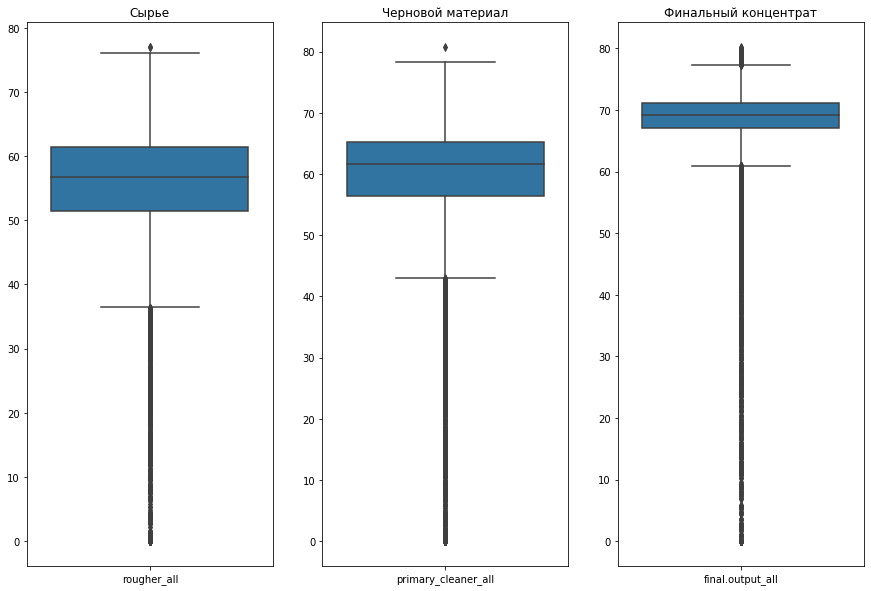

In [226]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
ax[0].set(title='Сырье')
ax[1].set(title='Черновой материал')
ax[2].set(title='Финальный концентрат')
sns.boxplot(data=rougher_all, ax=ax[0])
sns.boxplot(data=primary_cleaner_all, ax=ax[1])
sns.boxplot(data=final_output_all, ax=ax[2])
plt.show()

Удалим аномальные значение из обучающей выборки, чтобы улучшить качество обучения.

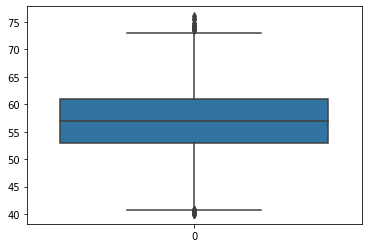

In [227]:

df_train_new['rougher_all'] = (
    df_train_new['rougher.input.feed_ag'] + 
    df_train_new['rougher.input.feed_pb'] + 
    df_train_new['rougher.input.feed_sol'] + 
    df_train_new['rougher.input.feed_au']
)


df_train_new = df_train_new.loc[df_train_new.loc[:,'rougher_all'] >= 40]

sns.boxplot(data=df_train_new['rougher_all'])
plt.show()

Подготовим обучающую и тестовую выборку. Добавим целевые столбцы и удалим ранее созданные столбцы необходимые для анализа.

In [228]:

df_full_target = df_full[['date', 'final.output.recovery', 'rougher.output.recovery']]

df_test_target = df_test.merge(df_full_target, on='date')
df_test_target = df_test_target.drop(['date'], axis=1)

df_test_target = df_test_target.loc[df_test_target.loc[:,'rougher.output.recovery'] > 0]
df_test_target = df_test_target.loc[df_test_target.loc[:,'final.output.recovery'] > 0]

In [229]:

df_train_final = df_train_new.merge(df_full_target, on='date')
df_train_final = df_train_final.drop(['date', 'rougher_all'], axis=1)

df_train_final = df_train_final.loc[df_train_final.loc[:,'rougher.output.recovery'] > 0]
df_train_final = df_train_final.loc[df_train_final.loc[:,'final.output.recovery'] > 0]

# 3. Модель

### 3.1.  Функция для вычисления итоговой sMAPE.


In [230]:
# разделение на обучающие признаки и целевые
features_train = df_train_final.drop(['rougher.output.recovery' , 'final.output.recovery'], axis=1)
target_train = df_train_final[['rougher.output.recovery' , 'final.output.recovery']]

features_test = df_test_target.drop(['rougher.output.recovery' , 'final.output.recovery'], axis=1)
target_test = df_test_target[['rougher.output.recovery' , 'final.output.recovery']]

# масштабирование признаков
numeric = features_train.columns

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [231]:
# функция для расчета sMAPE:
def sMAPE(target, predictions):
    result = np.abs(target-predictions) / ((np.abs(target) + np.abs(predictions)) / 2)
    total_result = (np.sum(result)) * 100  / target.shape[0]
    final_smape = 0.25 * total_result[0] + 0.75 * total_result[1]
    return final_smape

### 3.2. Обучение разных модели и оцените их качество кросс-валидацией. 

Выбор лучшей модели и проверьте её на тестовой выборке.

In [232]:
# разбиение на подвыборки для кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=2308)

# подготовим метрику для дальнейшего использования
smape_score = make_scorer(sMAPE, greater_is_better=False)

# словарь для результатов тесторвания
test_score = {}

#### 3.2.1 LinearRegression.

In [233]:
# обучим модель и проведем крос валидацию
line_reg_model = LinearRegression().fit(features_train, target_train)
cross_val = (cross_val_score(line_reg_model, 
                                 features_train, 
                                 target_train, 
                                 cv=kf, 
                                 scoring=smape_score
                                )
                  .mean()
                 )
print('Результат кросс-валидацией:', cross_val)

Результат кросс-валидацией: -7.29303265319993


In [234]:
# тестирлование модели на тестовой выборке.
predictions_test_LR = line_reg_model.predict(features_test)
smape_LR = sMAPE(target_test, predictions_test_LR)
test_score['LogisticRegression'] = [smape_LR]
print('Результат модели на тестовой выборки:',smape_LR)


Результат модели на тестовой выборки: 8.896850715314722


#### 3.2.2. DecisionTreeRegressor

In [235]:
# обучение модели DecisionTreeRegressor.
regr =  DecisionTreeRegressor(max_depth=14).fit(features_train, target_train)
cross_val = (cross_val_score(regr, 
                                 features_train, 
                                 target_train, 
                                 cv=kf, 
                                 scoring=smape_score
                                )
                  .mean()
                 )
print('Результат кросс-валидацией:', cross_val)

Результат кросс-валидацией: -6.5265348747309755


In [236]:
# проведем перебор параметров и обучение модели с помледующей проверкой результатов
for depth in range(1, 25):
    regr =  DecisionTreeRegressor(max_depth=depth).fit(features_train, target_train)
    predictions = regr.predict(features_train)
    scores = cross_val_score(regr, features_train, target_train, cv=kf, scoring=smape_score).mean()   
    print("max_depth =", depth, ":")
    print("Результат проверки на обучающей  выборке", sMAPE(target_train, predictions))
    print("Результат проверки при кросс-валидации", scores)
    print()

max_depth = 1 :
Результат проверки на обучающей  выборке 8.469359908857903
Результат проверки при кросс-валидации -8.471662641535309

max_depth = 2 :
Результат проверки на обучающей  выборке 8.072771242976463
Результат проверки при кросс-валидации -8.083294290131539

max_depth = 3 :
Результат проверки на обучающей  выборке 7.767075899919594
Результат проверки при кросс-валидации -7.7966116050662375

max_depth = 4 :
Результат проверки на обучающей  выборке 7.3648147975663285
Результат проверки при кросс-валидации -7.402493524277583

max_depth = 5 :
Результат проверки на обучающей  выборке 6.973971153872665
Результат проверки при кросс-валидации -7.1517645219903185

max_depth = 6 :
Результат проверки на обучающей  выборке 6.598824935355435
Результат проверки при кросс-валидации -6.935583377501717

max_depth = 7 :
Результат проверки на обучающей  выборке 6.1749142862467865
Результат проверки при кросс-валидации -6.747269742856757

max_depth = 8 :
Результат проверки на обучающей  выборке 5

In [237]:
# авоматизизированный перебор параметрров для проверки результата с помощью GridSearchCV
parameters = {'max_depth': range(5, 25)}
gs = GridSearchCV(DecisionTreeRegressor(random_state=12345), 
                  parameters,
                  cv=kf,
                  scoring=smape_score)

# обучение
gs.fit(features_train, target_train)
# просмотр лучших параметров
gs.best_params_

{'max_depth': 12}

In [238]:
# лучший результат
gs.best_score_

-6.512200563873014

In [239]:
predictions_test_DT = regr.predict(features_test)
smape_DT = sMAPE(target_test, predictions_test_DT)
test_score['DecisionTreeRegressor'] = [smape_DT]
print('Результат модели на тестовой выборки:',smape_DT)


Результат модели на тестовой выборки: 22.5034769160318


#### 3.2.2. RandomForestRegressor

In [240]:
# авоматизизированный перебор параметрров для проверки результата с помощью GridSearchCV
parameters = {'n_estimators': range(1, 20, 2),
              'max_depth': range(1, 15)
             }
gs = GridSearchCV(RandomForestRegressor(random_state=12345), 
                  parameters,
                  cv=kf,
                  scoring=smape_score)

# обучение
gs.fit(features_train, target_train)
# просмотр лучших параметров
gs.best_params_

{'max_depth': 14, 'n_estimators': 19}

In [241]:
# лучший результат
gs.best_score_

-5.22789527451459

In [242]:
# обучим модель случайного леса
rf_regr =  (RandomForestRegressor(max_depth=14, n_estimators=19, random_state=12345)
            .fit(features_train, target_train))

predictions_test_FT = rf_regr.predict(features_test)
smape_LR = sMAPE(target_test, predictions_test_FT)
test_score['RandomForestRegressor'] = [smape_LR]
print('Результат модели на тестовой выборки:',smape_LR)



Результат модели на тестовой выборки: 9.676018554705738


In [243]:
# таблица с результатами тестирования
df_score = pd.DataFrame.from_dict(data=test_score, columns=['sMAPE'], orient='index')
df_score

,sMAPE
LogisticRegression,8.896851
DecisionTreeRegressor,22.503477
RandomForestRegressor,9.676019


------
## Выводы:

Наилучшие качество при кросс-валидации показывает RandomForestRegressor, при этом на тестовой выборке качество хуже, чем на обучающей. При проверке на тестовой выборке лучший результат показала модель LogisticRegression.

Учитывая результаты кросс-валидации и тестирования оптимальная модель RandomForestRegressor.

------

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке